# SQL Prep

## Recap

Note: From Khan Academy *Intro to SQL* course.

### Creating tables

``` CREATE TABLE customers (id INTEGER PRIMARY KEY, name TEXT, age INTEGER, weight REAL);
```

### Inserting data

```INSERT INTO customers VALUES (73, "Brian", 33);```

```INSERT INTO customers (name, age) VALUES ("Brian", 33);```

### Querying data

Select everything

```SELECT * FROM customers;```

Filter with condition

```SELECT * FROM customers 
   WHERE age > 21;```

Order results

```SELECT * FROM customers 
    WHERE age > 21 
    ORDER BY age DESC;```
    
Transform with case

```SELECT name, 
    CASE 
        WHEN age > 18 THEN "adult" 
        ELSE "minor" 
    END "type" 
    FROM customers;```
    

### Grouping data

Using Group by

```SELECT gender, COUNT(*) 
    FROM students 
    GROUP BY gender;```

Filtering with having

```SELECT gender, COUNT(*) 
    FROM students 
    GROUP BY gender
    HAVING COUNT(*) > 10;```

### Joining tables

Inner join

```SELECT customers.name, orders.item 
    FROM customers 
    JOIN orders 
    ON customers.id = orders.customer_id;```

## Practice Questions

### Question 1 - From FaceBook

**Assume we have a table of employee information, which includes salary information. Write a query to find the names and salaries of the top 5 highest paid employees, in descending order.**

In [ ]:
'''
SELECT name, salary
FROM employees
ORDER BY salary DESC
LIMIT 5;
'''

### Question 2 - From Amazon

Assume we have two SQL tables: `authors` and `books`. The authors table has a few million rows, and looks like this: 

| author_name | book_name |
|:-----------:|:---------:|
|   author_1  |   book_1  |
|   author_1  |   book_2  |
|   author_2  |   book_3  |
|   author_2  |   book_4  |
|   author_2  |   book_5  |
|   author_3  |   book_6  |

The books dataset also has a few million rows, and looks like this:

| book_name | copies_sold |
|:---------:|:-----------:|
|   book_1  |    10000    |
|   book_2  |     2575    |
|   book_3  |    60000    |
|   book_4  |    98000    |
|   book_5  |     5250    |
|   book_6  |    19775    |

Write an SQL query that shows the top 3 authors who sold the most total books. 

In [ ]:
'''
SELECT authors.author_name, SUM(books.copies_sold) as total_sold
FROM authors
JOIN books
ON authors.book_name = books.book_name
GROUP BY authors.author_name
ORDER BY total_sold DESC
LIMIT 3;
'''

### Question 3 - From Amazon:

Assume you have two tables, `customers` and `orders`. Write a SQL query to select all customers who purchased at least 2 items on two separate days. 

In [ ]:
'''
SELECT c.customer_name, COUNT(DISTINCT o.order_date) as NumOrderDates
FROM (SELECT c.customer_name, o.quantity
      FROM customers c
      JOIN orders o
      ON c.orderNumber = o.orderNumber
      WHERE o.quantity > 1)
WHERE NumOrderDates >1
'''

### Question 4 - From Twitter:

A company uses 2 data tables, Employee and Department, to store data about its employees and departments.

Table Name: Employee

Attributes:

* ID Integer,
* NAME String,
* SALARY Integer,
* DEPT_ID Integer

Table Name: Department

Attributes:
* DEPT_ID Integer,
* NAME String,
* LOCATION String

Write a query to print the respective Department Name and number of employees for all departments in the Department table (even unstaffed ones).

Sort your result in descending order of employees per department; if two or more departments have the same number of employees, then sort those departments alphabetically by Department Name.

In [ ]:
'''
SELECT d.name, COUNT(e.id) as EmployeeCount
FROM Department d
LEFT OUTER JOIN Employee e
ON d.dept_id = e.dept_id
ORDER BY EmployeeCount DESC, d.NAME
'''

### Question 5 - From Data Interview Qs

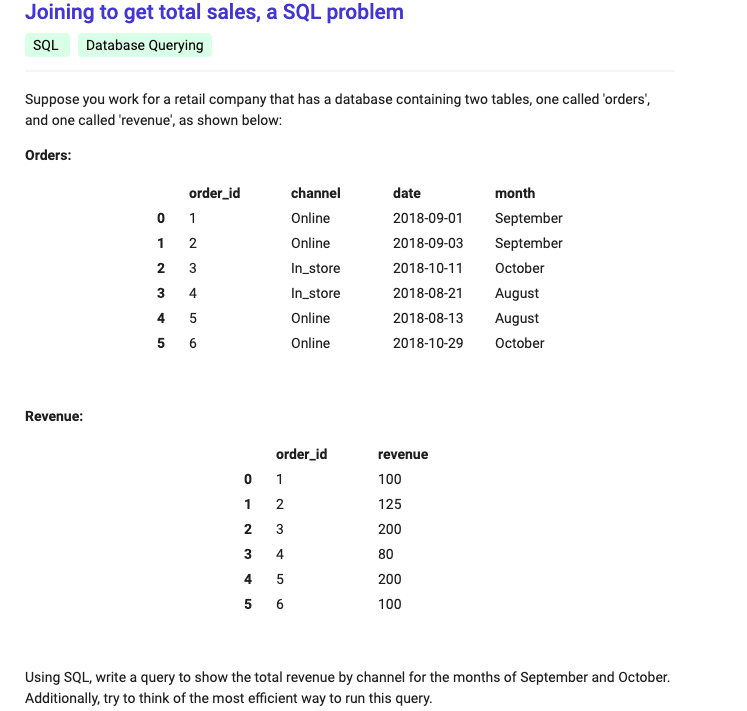

In [ ]:
'''
SELECT o.month, o.channel, SUM(r.revenue) as total_revenue
FROM Orders o
JOIN Revenue r
ON o.order_id = r.order_id
WHERE o.month IN ("September", "October")
GROUP BY o.month, o.channel
'''

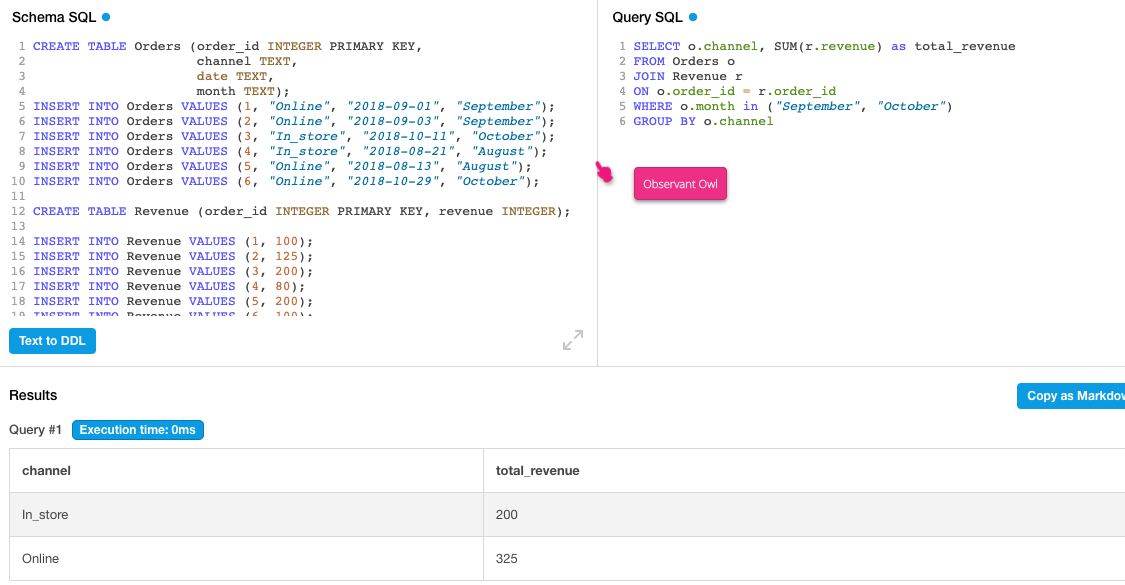

In [1]:
import pandas as pd
import pandasql
import numpy as np

In [2]:
order_id = [1, 2, 3, 4, 5, 6]
channel = ['Online', 'Online', 'In_store', 'In_store', 'Online', 'Online']
month = ['September', 'September', 'October', 'August', 'August', 'October']

In [3]:
order_data = {'order_id': order_id,
             'channel': channel,
             'month': month}

In [4]:
orders = pd.DataFrame(order_data)
orders

,order_id,channel,month
0,1,Online,September
1,2,Online,September
2,3,In_store,October
3,4,In_store,August
4,5,Online,August
5,6,Online,October


In [5]:
revenue_data = {'order_id': order_id,
               'revenue': [100, 125, 200, 80, 200, 100]
               }

In [6]:
revenue = pd.DataFrame(revenue_data)
revenue

,order_id,revenue
0,1,100
1,2,125
2,3,200
3,4,80
4,5,200
5,6,100


In [7]:
query = """ SELECT o.month,
                   o.channel, 
                   SUM(r.revenue) AS revenue
            FROM orders o
            JOIN revenue r
            ON o.order_id = r.order_id
            WHERE o.month IN ('September', 'October')
            GROUP BY o.month, o.channel
            """

In [8]:
pandasql.sqldf(query, globals())

,month,channel,revenue
0,October,In_store,200
1,October,Online,100
2,September,Online,225


### Question 6 - From Interview Query/Facebook

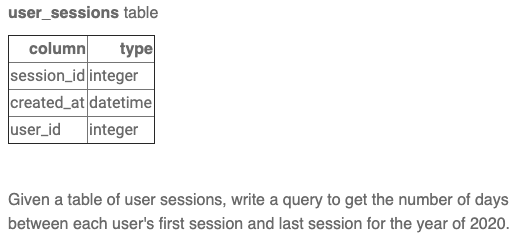

In [ ]:
'''
SELECT user_id, datediff(MAX(date(created_at))-MIN(date(created_at))) AS num_days
FROM user_sessions
WHERE extract(YEAR FROM created_at) = 2020
GROUP BY user_id
'''

### Question 7 - Interview Query Easy

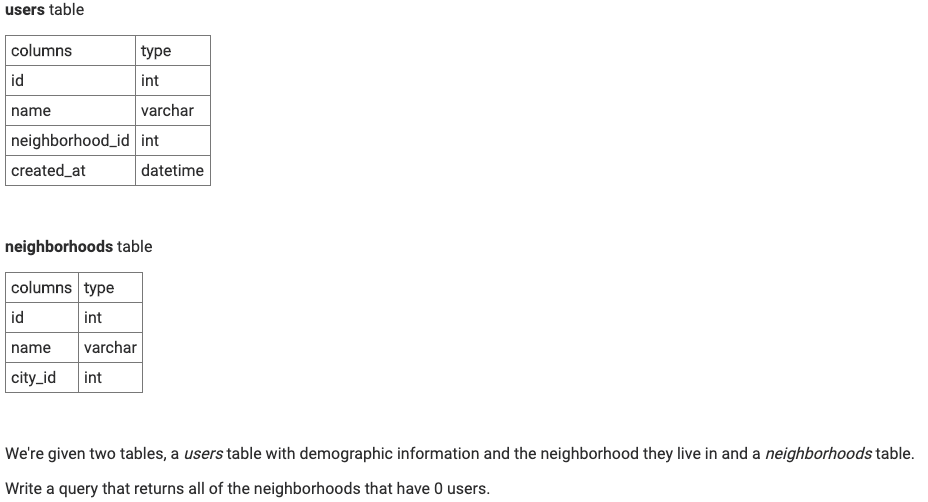

In [ ]:
'''
SELECT n.name
FROM neighborhoods n
LEFT JOIN users u
ON u.neighborhood_id = n.id
WHERE u.id IS NULL
'''

In [ ]:
# Alternative solution
'''
SELECT name
FROM neighborhoods
WHERE id NOT IN (SELECT DISTINCT neighborhood_id
                 FROM users)
'''